In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'..\data\03_processed\01_preprocessed.csv')
df.head()

,ID,Adres e-mail,Nazwa,"Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.",W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,...,FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR,"Jeżeli pominięto branżę, na której się znasz dopisz ją:"
0,1,anonymous,NaN,"Projekt ""data"" będący mobilną stacją benzynową...",Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,...,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,NaN
1,2,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN
2,3,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,...,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,NaN
3,4,anonymous,NaN,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,NaN
4,5,anonymous,NaN,Wirtualni doradcy wpływający na pozytywną zmia...,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,...,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,LawTech


In [3]:
columns_to_drop = ['Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.', 'Jeżeli pominięto branżę, na której się znasz dopisz ją:']
df.drop(columns=columns_to_drop, inplace=True)

In [4]:
df.head()

,ID,Adres e-mail,Nazwa,W jaki sposób chcesz uczestniczyć w Community?,Programming: R,Programming: Python,Programming: Bash,Version Control: GIT,Containers: Docker,"CLI: (np. Bash, PowerShell, CMD)",...,"Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:",FinTech,HealthTech,FashionTech,E-commerce,SportTech,Non-profit,PropTech (nieruchomości),Cybersecurity,HR
0,1,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,2.0,3.0,3.0,4.0,3.0,4.0,...,NaN,3.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0
1,2,anonymous,NaN,Chcę uczestniczyć w projekcie data,3.0,3.0,1.0,3.0,2.0,2.0,...,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,anonymous,NaN,Chcę uczestniczyć w projekcie data,0.0,1.0,0.0,1.0,0.0,0.0,...,NaN,3.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0
3,4,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,Excel,3.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0
4,5,anonymous,NaN,Chcę uczestniczyć w projekcie data i organizow...,3.0,3.0,2.0,2.0,2.0,2.0,...,NaN,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [5]:
columns_not_for_analysis = ['ID', 'Adres e-mail', 'Nazwa', 'W jaki sposób chcesz uczestniczyć w Community?', 'Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:']
df1 = df.drop(columns=columns_not_for_analysis)

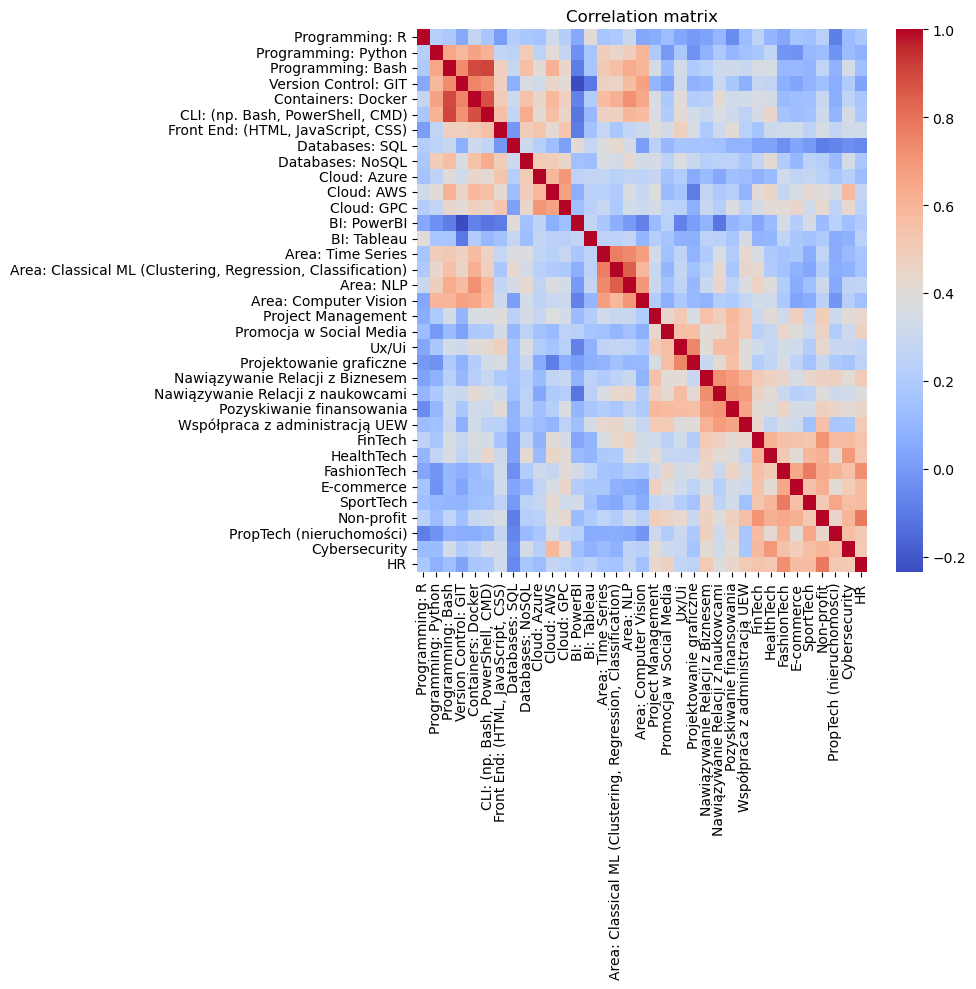

In [14]:
correlation_matrix = df1.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')

plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

It hard to read so it should be split

In [33]:
programming = ['Programming: R', 'Programming: Python', 'Programming: Bash', 'Version Control: GIT'
               ,'CLI: (np. Bash, PowerShell, CMD)', 'Front End: (HTML, JavaScript, CSS)']
machine_learning = ['Containers: Docker','Area: Time Series', 'Area: Classical ML (Clustering, Regression, Classification)', 'Area: NLP', 'Area: Computer Vision']
databases = ['Databases: SQL', 'Databases: NoSQL', 'Cloud: Azure', 'Cloud: AWS', 'Cloud: GPC', 'BI: PowerBI', 'BI: Tableau']
soft = ['Project Management', 'Promocja w Social Media', 'Ux/Ui', 'Projektowanie graficzne', 'Nawiązywanie Relacji z Biznesem', 
        'Nawiązywanie Relacji z naukowcami', 'Pozyskiwanie finansowania', 'Współpraca z administracją UEW']
branches = ['FinTech', 'HealthTech', 'FashionTech', 'E-commerce', 'SportTech', 'Non-profit', 'PropTech (nieruchomości)', 'Cybersecurity', 'HR']

In [38]:
cm1 = df[programming].corr()

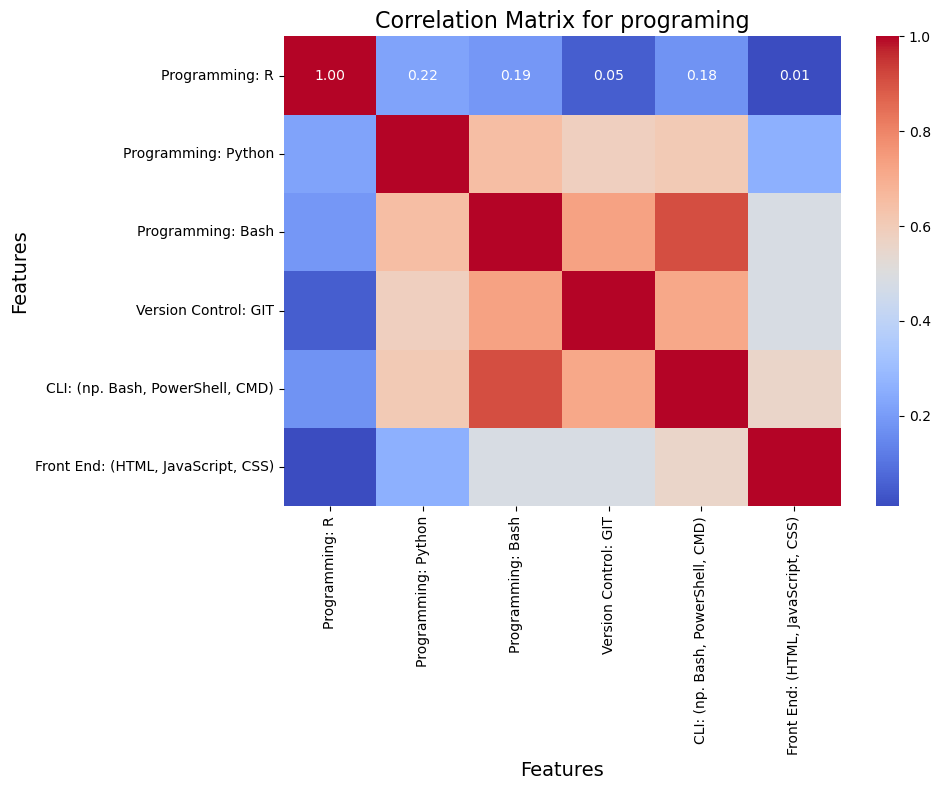

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix for programing', fontsize=16)


plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)


plt.tight_layout()
plt.show()

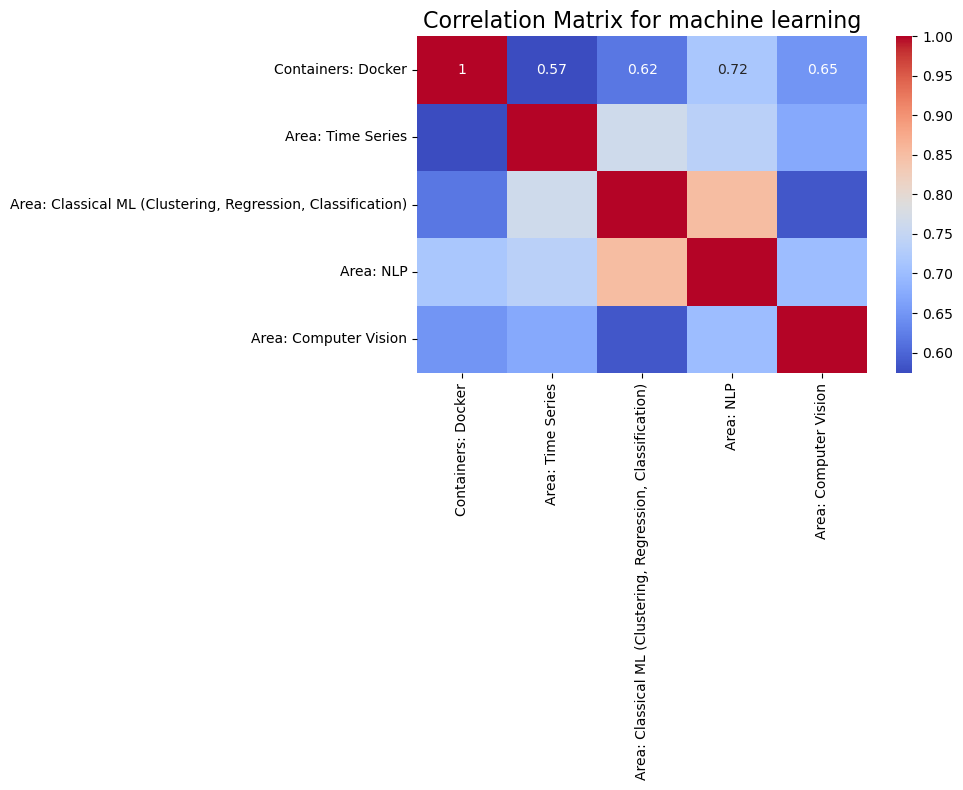

In [45]:
cm2 = df[machine_learning].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cm2, cmap='coolwarm', annot=True, )
plt.title('Correlation Matrix for machine learning', fontsize=16)

plt.tight_layout()
plt.show()